# JupyterLab

**All-in-one web-based interactive data processing platform**

---

**Yawei Liu**

*2021/06/14*

## Launch jupterlab
* ```cd /some_folder_name```
* ```jupyter-lab```

**Note**: Jupyerlab file `.ipynb` can also be directly opened and run in vscode without using above commands.

## Tips and tricks

### Load modules
* build-in/third party modules
    * ```import numpy as np```
    * ```from scipy import optimize```
* automatically reload all changed code (own modules)
    * ```%reload_ext autoreload```
    * ```%autoreload 2```

In [22]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
pd.options.display.max_rows = 6
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PIL

## Python packages for data processing

### [Numpy](https://numpy.org/)

**Scientific computing based on *array* in Python**

In [9]:
import numpy as np
boxL = 5
np.random.seed(10)
points = boxL*np.random.random_sample((20,3))-boxL/2.
points[:,2] = 0
display(points)

array([[ 1.35660322, -2.39624025,  0.        ],
       [ 1.24401941, -0.00746494,  0.        ],
       [-1.50968568,  1.30265356,  0.        ],
       [-2.05830093,  0.92679909,  0.        ],
       [-2.48025867,  0.06096132,  0.        ],
       [ 0.56263033,  1.10877659,  0.        ],
       [ 2.08887061,  1.07287892,  0.        ],
       [-1.78914976, -0.6332962 ,  0.        ],
       [-0.29083413, -0.32993003,  0.        ],
       [ 0.06569121,  0.75198591,  0.        ],
       [ 1.52611598,  0.10823576,  0.        ],
       [-0.90381956, -2.04770325,  0.        ],
       [-1.93007819,  1.64340663,  0.        ],
       [ 0.63143574,  0.23793078,  0.        ],
       [-1.5052623 ,  1.78425151,  0.        ],
       [ 1.27323846, -1.02019147,  0.        ],
       [-0.87244181, -1.67492051,  0.        ],
       [-2.03269813,  1.60552829,  0.        ],
       [-0.57942776,  2.22130356,  0.        ],
       [-0.21847726,  1.63061422,  0.        ]])

### [Pandas](https://pandas.pydata.org/docs/index.html)

**Working with “labeled” data in Python**

In [10]:
import pandas as pd
pd.options.display.max_rows = 6
data = pd.DataFrame(points,columns=['x', 'y', 'z'])
display(data)

,x,y,z
0,1.356603,-2.396240,0.0
1,1.244019,-0.007465,0.0
2,-1.509686,1.302654,0.0
...,...,...,...
17,-2.032698,1.605528,0.0
18,-0.579428,2.221304,0.0
19,-0.218477,1.630614,0.0


### [Matplotlib](https://matplotlib.org/)

**Creating static visualizations in Python**

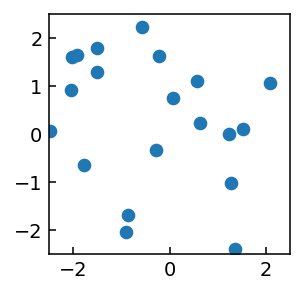

In [11]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

fig = plt.figure(figsize=(4,2.2), dpi=140);
ax = fig.add_subplot(111);
x = data['x']
y = data['y']
ax.plot(x,y,'o')
ax.set_aspect('equal')
ax.set_xlim(-boxL/2,boxL/2);
ax.set_ylim(-boxL/2,boxL/2);
ax.tick_params(direction='in')
plt.tight_layout()

### [Scipy](https://www.scipy.org/)

**Scientific computing and technical computing in Python**

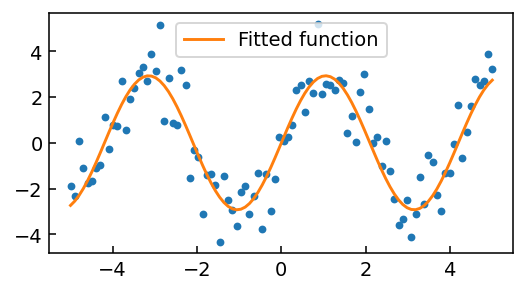

In [12]:
#curve fit
from scipy import optimize
def test_func(x, a, b):
    return a * np.sin(b * x)

x_data = np.linspace(-5, 5, num=100)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=100)
fig = plt.figure(figsize=(4,2.2), dpi=140);
ax = fig.add_subplot(111);
ax.plot(x_data,y_data,'.')
popt,pcov = optimize.curve_fit(test_func,x_data,y_data,p0=[2,2])
ax.plot(x_data,test_func(x_data,*popt),'-',label='Fitted function')
ax.legend(loc='best')
ax.tick_params(direction='in')
plt.tight_layout()

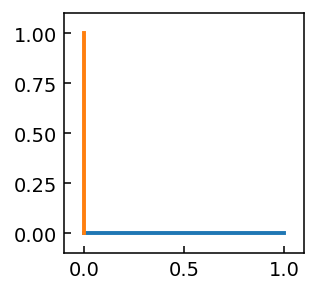

In [13]:
#rotation operation
from scipy.spatial.transform import Rotation as R
#a counter-clockwise rotation of 90 degrees about the z-axis
r = R.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])

fig = plt.figure(figsize=(4,2.2), dpi=140);
ax = fig.add_subplot(111)
vec = np.array([[0,0,0],[1,0,0]],dtype=int)
ax.plot(vec[:,0],vec[:,1],'tab:blue',lw=2)
vec = r.apply(vec)
ax.plot(vec[:,0],vec[:,1],'tab:orange',lw=2)
ax.set_aspect('equal')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.tick_params(direction='in')
plt.tight_layout()
plt.show()

## Python packages for particle data processing

### [Freud](https://freud.readthedocs.io/en/latest/)

The freud Python library provides a simple, flexible, powerful set of tools for **analyzing trajectories** obtained from molecular dynamics or Monte Carlo simulations. High performance, parallelized C++ is used to compute standard tools such as **radial distribution functions, correlation functions, order parameters, and clusters, as well as original analysis methods including potentials of mean force and torque (PMFTs) and local environment matching**. 

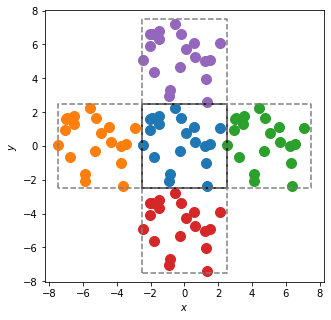

In [14]:
#freud.box
import freud

#define a box
box = freud.box.Box.from_matrix([[boxL, 0, 0], [0, boxL, 0], [0, 0, 0]])

fig, ax = plt.subplots(figsize=(5, 5))
box.plot(ax=ax)
ax.scatter(points[:, 0], points[:, 1],s=100)
for image in [[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0]]:
    box.plot(ax=ax, image=image, linestyle='dashed', color='gray')
    point_images = box.unwrap(points, image)
    ax.scatter(point_images[:, 0], point_images[:, 1],s=100)
plt.show()

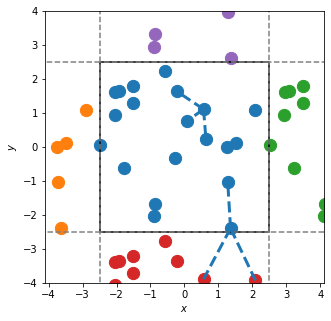

In [15]:
#freud.neighbour
aq = freud.locality.AABBQuery(box, points) # the sea of points
query_result = aq.query(points, dict(num_neighbors=3,exclude_ii=True)) # find query point's neighours in the sea
nlist = query_result.toNeighborList()
fig, ax = plt.subplots(figsize=(5, 5))
box.plot(ax=ax);ax.scatter(points[:, 0], points[:, 1],s=150)
for image in [[-1, 0, 0], [1, 0, 0], [0, -1, 0], [0, 1, 0]]:
    box.plot(ax=ax, image=image, linestyle='dashed', color='gray')
    point_images = box.unwrap(points, image)
    ax.scatter(point_images[:, 0], point_images[:, 1],s=150)
for i,j in nlist[:]:
    if i!=0 and i!=5: continue
    rij = box.wrap(points[j] - points[i]);ri = points[i]; rj = points[i]+rij 
    ax.plot((ri[0],rj[0]),(ri[1],rj[1]),'--',lw=3,color='tab:blue')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.show()

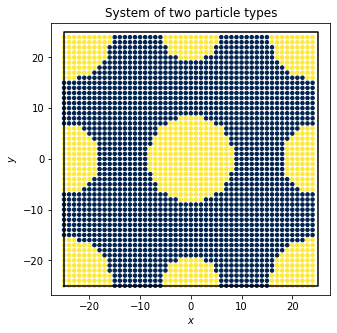

In [16]:
#freud.interface
np.random.seed(0)
system_size = 50
num_grains = 2
uc = freud.data.UnitCell.square()
box, points = uc.generate_system(num_replicas=system_size, scale=1)
_, centroids = uc.generate_system(num_replicas=num_grains, scale=system_size/num_grains)
system = freud.AABBQuery(box, points)
values = np.array([-1 for p in points])
grain_radii = np.abs(np.random.normal(size=num_grains**2, loc=5, scale=2))
for center, radius in zip(centroids, grain_radii):
    for i, j, dist in system.query(center, {'r_max': radius}):
        values[j] = 1
plt.figure(figsize=(5, 5))
system.plot(ax=plt.gca(), c=values, cmap='cividis', s=12)
plt.title('System of two particle types')
plt.show()

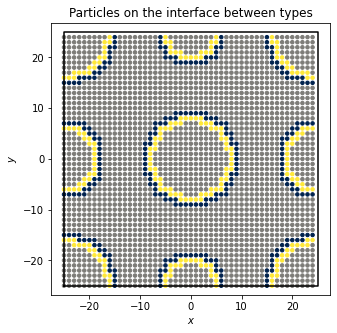

In [17]:
iface = freud.interface.Interface()
iface.compute((box, points[values > 0]), points[values < 0], neighbors={'r_max': 1.5})

plt.figure(figsize=(5, 5))
interface_values = np.zeros(len(points))
interface_values[np.where(values < 0)[0][iface.query_point_ids]] = -1
interface_values[np.where(values > 0)[0][iface.point_ids]] = 1

system.plot(ax=plt.gca(), c=interface_values, cmap='cividis', s=12)
plt.title('Particles on the interface between types')
plt.show()

### [Plato](https://plato-draw.readthedocs.io/en/latest/)

**Efficient interactive visualization of particle data**

In [18]:
import plato.draw.pythreejs as draw
box_prim = draw.Box(Lx=boxL, Ly=boxL, Lz=boxL, width=0.1)
points = boxL*np.random.random_sample((20,3))-boxL/2.
sphere_prim = draw.Spheres(
        positions= points,
        radii=0.5,
        colors=matplotlib.colors.to_rgba('tab:blue'),
        vertex_count=200
        )
draw.Scene((box_prim,sphere_prim),zoom=2,size=[20,20])

/Users/yaweiliu/usr/miniforge3/envs/myenv/lib/python3.9/site-packages/jupyter_client/session.py:716: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Renderer(camera=OrthographicCamera(bottom=-10.0, children=(DirectionalLight(intensity=0.692820323027551, posit…

### [Fresnel](https://fresnel.readthedocs.io/en/stable/)

**High-quality, static raytraced visualization of particle data**

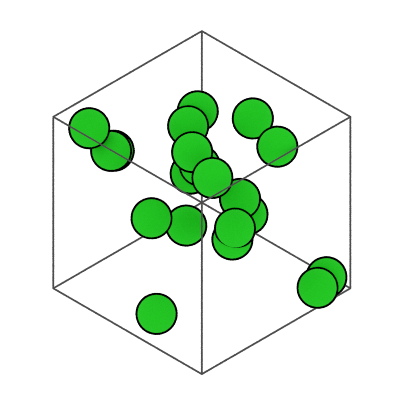

In [19]:
import fresnel
device = fresnel.Device(mode='cpu');
path_tracer = fresnel.tracer.Path(device, 400, 400)
scene = fresnel.Scene(device)
scene.lights = fresnel.light.lightbox();
geometry = fresnel.geometry.Sphere(scene,position=points,radius=0.5,outline_width=0.05)
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.1, 0.8, 0.1]),
                                              roughness=0.8,specular=0.2)
box = np.array([boxL,boxL,boxL])
g = fresnel.geometry.Box(scene,box,box_radius=0.02,box_color=fresnel.color.linear([0.3, 0.3, 0.3]))
scene.camera = fresnel.camera.Orthographic.fit(scene)
path_tracer.sample(scene, samples=64,light_samples=32)

### [mdanalysis](https://www.mdanalysis.org/) and [nglview](https://github.com/nglviewer/nglview)

**Handling, analysis, visulization of molecular simulations data**

In [20]:
from MDAnalysis import Universe
from MDAnalysisTests import datafiles
import nglview as nv

In [21]:
u = Universe(datafiles.PSF,datafiles.DCD)
view = nv.show_mdanalysis(u)
view

NGLWidget(max_frame=97)

<img title="mdanalysis" alt="mdanalysis" src="./images/mdanalysis.gif">